<img src="">
    


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/300px-Olympic_rings_without_rims.svg.png" 
 alt="Logo JJOO" width=480px>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Cómo primer paso realizamos los import de librerias necesarias para esta primera entrega, estas librerias nos permiten trabajar con pandas, numpy, y gráficos

In [2]:
dfAt = pd.read_csv('Olympic_Athlete_Bio.csv')
dfMed = pd.read_csv('Olympic_Games_Medal_Tally.csv')
dfEvR = pd.read_csv('Olympic_Athlete_Event_Results.csv')
dfOlR = pd.read_csv('Olympic_Results.csv')
dfLoc =  pd.read_csv('Olympics_Games.csv')

#### A continuación, cargamos los dataset correspondientes, en este caso aquellos correspondientes a los juegos olimpicos

In [3]:
dfAt.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
0,16809,Károly Teppert,Male,1891-07-20,na,na,Hungary,HUN,Károly Teppert started competing in cycling in...,na
1,43737,Andrzej Socharski,Male,1947-08-31,173.0,72,Poland,POL,na,Listed in Olympians Who Won a Medal at the Wor...
2,50147,Nathalie Wunderlich,Female,1971-06-03,170.0,50,Switzerland,SUI,na,na
3,5085,Miha Lokar,Male,1935-09-10,182.0,76,Yugoslavia,YUG,na,Listed in Olympians Who Won a Medal at the Eur...
4,136329,Austin Hack,Male,1992-05-17,203.0,100,United States,USA,na,na


In [4]:
dfEvR.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False


#### En este paso, realizamos un merge a ambos dataframes, para trabajar con ese a continuación

In [5]:
df =pd.merge(
    dfEvR.filter(items=['athlete_id', 'result_id', 'pos', 'medal', 'isTeamSport']),
    dfAt,
    how='left',
    on='athlete_id')

df = pd.merge(
    df,
    dfOlR,
    how='left',
    on='result_id')

df = pd.merge(
    df,
    dfLoc.filter(items=['edition_id', 'year']),
    how='left',
    on='edition_id')

#### En este paso, decidimos eliminar columnas que consideramos poco relevantes para llevar a cabo los estudios que llevaremos adelante

In [6]:
df = df.drop('description',axis = 1)
df = df.drop('special_notes',axis = 1)
df = df.drop('result_id',axis = 1)
df = df.drop('sport_url',axis = 1)
df = df.drop('result_description',axis = 1)
df = df.drop('result_format',axis = 1)
df = df.drop('result_detail',axis = 1)
df = df.drop('result_participants',axis = 1)

In [7]:
df.sample(5)

,athlete_id,pos,medal,isTeamSport,name,sex,born,height,weight,country,country_noc,event_title,edition,edition_id,sport,result_location,start_date,end_date,time,year
25690,36646,14,na,False,Ali Ibrahim,Male,1971-12-19,196.0,85,Egypt,EGY,"Single Sculls, Men",2004 Summer Olympics,26.0,Rowing,"Olympiako Kopelatodramio Skhoinia, Schinias Na...",2004-08-14,2004-08-21,na,2004.0
259763,81157,9,na,False,Nataliya Shive-Glebova,Female,1963-04-30,173.0,66,Soviet Union,URS,"500 metres, Women",1988 Winter Olympics,43.0,Speed Skating,"Olympic Oval, Calgary",1988-02-22,na,18:00,1988.0
276036,59934,4,na,False,Paul Dätwyler,Male,1916-03-13,na,na,Switzerland,SUI,"Light-Heavyweight, Freestyle (≤87 kilograms), Men",1936 Summer Olympics,11.0,Wrestling,"Deutschlandhalle, Berlin",1936-08-03,1936-08-04,na,1936.0
274468,6861,2,Silver,True,Dražen Petrović,Male,1964-10-22,197.0,89,Croatia Yugoslavia,CRO,"Basketball, Men",1988 Summer Olympics,22.0,Basketball,"Jam-sil Che-yuk-gwan, Seoul Sports Complex, Seoul",1988-09-17,1988-09-30,na,1988.0
244756,23110,6 p1 r4/5,na,False,Ryszard Parulski,Male,1938-03-09,188.0,85,Poland,POL,"Foil, Individual, Men",1960 Summer Olympics,15.0,Fencing,"Palazzo dei Congressi, Roma",1960-08-29,1960-08-30,na,1960.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314907 entries, 0 to 314906
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   athlete_id       314907 non-null  int64  
 1   pos              314907 non-null  object 
 2   medal            314907 non-null  object 
 3   isTeamSport      314907 non-null  bool   
 4   name             314907 non-null  object 
 5   sex              314907 non-null  object 
 6   born             314907 non-null  object 
 7   height           314907 non-null  object 
 8   weight           314907 non-null  object 
 9   country          314907 non-null  object 
 10  country_noc      314907 non-null  object 
 11  event_title      314803 non-null  object 
 12  edition          314803 non-null  object 
 13  edition_id       314803 non-null  float64
 14  sport            314803 non-null  object 
 15  result_location  314803 non-null  object 
 16  start_date       314803 non-null  obje

In [9]:
print(min(df.year))

print(max(df.year))

1896.0
2022.0


#### Los datos mas antiguos presentes en el dataset, datan del año 1896 hasta los mas recientes con una fecha limite del año 2022.

In [10]:
df['born'] = df['born'].replace('na','0')
df['height'] = df['height'].replace('na','0')
df['weight'] = df['weight'].replace('na','0')

#### Rellenamos los nulos presentes en Peso, Estatura y fecha de nacimiento.

In [11]:
df.sample(10)

,athlete_id,pos,medal,isTeamSport,name,sex,born,height,weight,country,country_noc,event_title,edition,edition_id,sport,result_location,start_date,end_date,time,year
99025,923250,5,na,True,Jack Parry,Male,1922-06-18,0,0,Canada,CAN,"4 x 100 metres Relay, Men",1948 Summer Olympics,12.0,Athletics,"Empire Stadium, Wembley, London",1948-08-06,1948-08-07,na,1948.0
62645,120834,=33,na,False,Golan Pollack,Male,1991-09-10,175.0,66,Israel,ISR,"Half-Lightweight (≤66 kilograms), Men",2012 Summer Olympics,54.0,Judo,"ExCeL, Newham, London (Hall 2)",2012-07-29,na,na,2012.0
224929,2000657,AC,na,False,Rhea Silvia Radu,Female,1900-05-18,0,0,Romania,ROU,"Painting, Open",1952 Summer Olympics,13.0,Art Competitions,"Helsingin Taidehalli, Helsinki",1952-07-16,1952-08-03,na,1952.0
308408,89098,=26 r1/2,na,False,Erin Aldrich,Female,1977-12-27,186.0,62,United States,USA,"High Jump, Women",2000 Summer Olympics,25.0,Athletics,"Olympic Stadium, Olympic Park, Sydney, New Sou...",2000-09-28,2000-09-30,na,2000.0
148888,34918,13,na,True,Masaru Sakano,Male,1942-03-20,171.0,68,Japan,JPN,"Team, Men",1972 Summer Olympics,18.0,Modern Pentathlon,"Reitstadion, Riem, München / Fechthalle 2, Mes...",1972-08-27,1972-08-31,na,1972.0
177504,88031,13,na,False,Sergey Klevchenya,Male,1971-01-21,176.0,70,Russian Federation Unified Team,RUS,"500 metres, Men",2002 Winter Olympics,47.0,Speed Skating,"Utah Olympic Oval, Kearns, Utah",2002-02-11,2002-02-12,na,2002.0
45844,50547,3 h3 r1/3,na,False,Viktor Legát,Male,1905-01-01,0,0,Czechoslovakia,TCH,"100 metres Freestyle, Men",1924 Summer Olympics,8.0,Swimming,"Piscine des Tourelles, Saint-Mandé",1924-07-19,1924-07-20,na,1924.0
15493,86775,5 h3 r2/3,na,False,Jiří Mužík,Male,1976-09-01,181.0,77,Czech Republic,CZE,"400 metres Hurdles, Men",2004 Summer Olympics,26.0,Athletics,"Olympiako Stadio, Olympiako Athletiko Kentro A...",2004-08-23,2004-08-26,na,2004.0
208979,43448,14,na,False,Joop van Domselaar,Male,1928-09-11,183.0,92,Netherlands,NED,"Small-Bore Rifle, Prone, 50 metres, Men",1964 Summer Olympics,16.0,Shooting,"Asaka Shooting Range, Nezu Park, Asaka, Saitama",1964-10-16,na,09:00-11:30,1964.0
254851,81606,9,na,False,Anna Kaaleste,Female,1930-01-17,0,0,Soviet Union,URS,"10 kilometres, Women",1956 Winter Olympics,35.0,Cross Country Skiing,"Stadio della Neve, Cortina d'Ampezzo",1956-01-28,na,10:00,1956.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314907 entries, 0 to 314906
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   athlete_id       314907 non-null  int64  
 1   pos              314907 non-null  object 
 2   medal            314907 non-null  object 
 3   isTeamSport      314907 non-null  bool   
 4   name             314907 non-null  object 
 5   sex              314907 non-null  object 
 6   born             314907 non-null  object 
 7   height           314907 non-null  object 
 8   weight           314907 non-null  object 
 9   country          314907 non-null  object 
 10  country_noc      314907 non-null  object 
 11  event_title      314803 non-null  object 
 12  edition          314803 non-null  object 
 13  edition_id       314803 non-null  float64
 14  sport            314803 non-null  object 
 15  result_location  314803 non-null  object 
 16  start_date       314803 non-null  obje

In [13]:
#df.loc[df['country_noc'] == 'USA'] 
#df.loc[df['country_noc] == 'UVI'] 
#df.loc[df['country_noc'] == 'UNK']
#df.loc[df['country_noc'] == 'URU'] 
#df.loc[df['country_noc'] == 'UZB']
#df.loc[df['country_noc'] == 'VAN'] 
#df.loc[df['country_noc'] == 'VEN'] 
#df.loc[df['country_noc'] == 'VIE'] 
#df.loc[df['country_noc'] == 'FRG'] 
#df.loc[df['country_noc'] == 'WIF'] 
#df.loc[df['country_noc'] == 'YEM'] 
#df.loc[df['country_noc'] == 'YUG'] 
#df.loc[df['country_noc'] == 'ZAM'] 
#df.loc[df['country_noc'] == 'ZIM'] 
#df.loc[df['country_noc'] == 'ROC'] 

En este paso, verificamos que existan registros correctos por cada país y además para verificar que la sigla de cada país corresponda

In [14]:
df.loc[df['country_noc'] == 'ROC'].head(5)

,athlete_id,pos,medal,isTeamSport,name,sex,born,height,weight,country,country_noc,event_title,edition,edition_id,sport,result_location,start_date,end_date,time,year
112789,138399,DNF,na,False,Ivan Kuznetsov,Male,1996-06-08,0,0,ROC,ROC,"Giant Slalom, Men",2018 Winter Olympics,60.0,Alpine Skiing,"Yongpyong Alpine Centre, Mountain Cluster, Dae...",2018-02-18,na,10:15,2018.0
112790,109900,17,na,False,Aleksandr Khoroshilov,Male,1984-02-16,182.0,80,ROC Russian Federation,ROC,"Slalom, Men",2018 Winter Olympics,60.0,Alpine Skiing,"Yongpyong Alpine Centre, Mountain Cluster, Dae...",2018-02-22,na,10:15,2018.0
112791,138399,DNF,na,False,Ivan Kuznetsov,Male,1996-06-08,0,0,ROC,ROC,"Slalom, Men",2018 Winter Olympics,60.0,Alpine Skiing,"Yongpyong Alpine Centre, Mountain Cluster, Dae...",2018-02-22,na,10:15,2018.0
112792,128301,DNF,na,False,Pavel Trikhichev,Male,1992-11-07,177.0,74,ROC Russian Federation,ROC,"Alpine Combined, Men",2018 Winter Olympics,60.0,Alpine Skiing,"Jeongseon Alpine Centre, Mountain Cluster, Buk...",2018-02-13,na,11:30,2018.0
112793,137777,30,na,False,Anastasiya Silantyeva,Female,1998-08-27,0,0,ROC Russian Federation,ROC,"Giant Slalom, Women1",2018 Winter Olympics,60.0,Alpine Skiing,"Yongpyong Alpine Centre, Mountain Cluster, Dae...",2018-02-15,na,10:00,2018.0


#### Debido a los acontecimientos ocurridos en 2019, relacionados al escandalo de atletas involucrados en infracciones de dopaje y sumado a los numerosos intentos de sabotear datos informáticos también relacionados, los competidores de Rusia estaban inicialmente suspendidos de representar a su país ,por lo que debieron cambiar su equipo y bandera por el de "Comite Olimpico de Rusia" para poder ser participes en los proximos 4 años como amonestación. 

#### Es por esta razón que figura tambien un "Pais" como ROC dentro del dataset, país que vendria a ser el 'Comité Olympico de Rusia'.
Fuente: https://as.com/juegos_olimpicos/2021/07/19/noticias/1626688448_829862.html#:~:text=La%20Agencia%20Mundial%20Antidopaje%20sancionó,como%20país%2C%20no%20estará%20presente.

In [15]:
df = df.sort_values('country', ascending=True)
df.head(20)

,athlete_id,pos,medal,isTeamSport,name,sex,born,height,weight,country,country_noc,event_title,edition,edition_id,sport,result_location,start_date,end_date,time,year
1770,57066,AC,na,False,Ahmad Djan,Male,1948-02-10,165.0,52,Afghanistan,AFG,"Bantamweight, Freestyle (≤57 kilograms), Men",1968 Summer Olympics,17.0,Wrestling,"Pista de Hielo Insurgentes, Ciudad de México",1968-10-17,1968-10-20,na,1968.0
1741,701510,=11,na,True,Usman Mohammad,Male,0,0,0,Afghanistan,AFG,"Hockey, Men",1956 Summer Olympics,14.0,Hockey,"Melbourne Cricket Ground, Melbourne, Victoria ...",1956-11-23,1956-12-06,na,1956.0
1742,64261,7 h6 r1/4,na,False,Abdul Hadi Shekaib,Male,1940-04-27,178.0,68,Afghanistan,AFG,"100 metres, Men",1960 Summer Olympics,15.0,Athletics,"Stadio Olimpico, Roma",1960-08-31,1960-09-01,na,1960.0
1743,64265,6 h8 r1/4,na,False,Ali Zaid,Male,1940-06-02,168.0,58,Afghanistan,AFG,"200 metres, Men",1960 Summer Olympics,15.0,Athletics,"Stadio Olimpico, Roma",1960-09-02,1960-09-03,na,1960.0
1744,64262,7 h1 r1/4,na,False,Habib Sayed,Male,1936-12-18,170.0,58,Afghanistan,AFG,"400 metres, Men",1960 Summer Olympics,15.0,Athletics,"Stadio Olimpico, Roma",1960-09-03,1960-09-06,na,1960.0
1745,64257,DNS,na,False,Abdul Ghafar Ghafoori,Male,1937-09-15,172.0,70,Afghanistan,AFG,"800 metres, Men",1960 Summer Olympics,15.0,Athletics,"Stadio Olimpico, Roma",1960-08-31,1960-09-02,na,1960.0
1746,64257,DNS,na,False,Abdul Ghafar Ghafoori,Male,1937-09-15,172.0,70,Afghanistan,AFG,"1,500 metres, Men",1960 Summer Olympics,15.0,Athletics,"Stadio Olimpico, Roma",1960-09-03,1960-09-06,na,1960.0
1747,64263,AC h2 r1/4,na,False,Abdul Wardak,Male,1940-08-15,179.0,75,Afghanistan,AFG,"110 metres Hurdles, Men",1960 Summer Olympics,15.0,Athletics,"Stadio Olimpico, Roma",1960-09-03,1960-09-05,na,1960.0
1748,64262,DNS,na,False,Habib Sayed,Male,1936-12-18,170.0,58,Afghanistan,AFG,"400 metres Hurdles, Men",1960 Summer Olympics,15.0,Athletics,"Stadio Olimpico, Roma",1960-08-31,1960-09-02,na,1960.0
1749,64257,4 h4 r1/3,na,True,Abdul Ghafar Ghafoori,Male,1937-09-15,172.0,70,Afghanistan,AFG,"4 x 100 metres Relay, Men",1960 Summer Olympics,15.0,Athletics,"Stadio Olimpico, Roma",1960-09-07,1960-09-08,na,1960.0


#### Aqui guardamos todos los países correspondientes a analizar en una variable, para después crear otro dataframe que solo contenga participantes con esos países.

In [16]:
valores = ['USA','ISV','UNK','URU','UZB','VAN','VEN','VIE','FRG','WIF','YEM','YUG','ZAM','ZIM','ROC']
Df = df[df['country_noc'].isin(valores)]
Df

,athlete_id,pos,medal,isTeamSport,name,sex,born,height,weight,country,country_noc,event_title,edition,edition_id,sport,result_location,start_date,end_date,time,year
113052,146218,2,Silver,True,Ilya Karpenkov,Male,1997-02-17,0,0,ROC,ROC,"3x3 Basketball, Men",2020 Summer Olympics,61.0,3x3 Basketball,"Aomi Urban Sports Park, Koto, Tokyo",2021-07-24,2021-07-28,na,2020.0
113008,137898,5,na,True,Emina Malagich,Female,1995-08-29,166.0,56,ROC,ROC,"3,000 metres Relay, Women",2018 Winter Olympics,60.0,Short Track Speed Skating,"Gangneung Ice Arena, Gangneung Olympic Park, C...",2018-02-10,2018-02-20,na,2018.0
113010,137880,15,na,False,Vlad Marchenkov,Male,1996-10-29,189.0,89,ROC,ROC,"Skeleton, Men",2018 Winter Olympics,60.0,Skeleton,"Olympic Sliding Centre, Alpensia Resort, Mount...",2018-02-15,2018-02-16,na,2018.0
113013,137884,34,na,False,Mikhail Nazarov,Male,1994-10-14,180.0,63,ROC,ROC,"Normal Hill, Individual, Men",2018 Winter Olympics,60.0,Ski Jumping,"Alpensia Ski Jumping Centre, Alpensia Resort, ...",2018-02-08,2018-02-10,na,2018.0
113057,147652,2,Silver,True,Yevgeniya Frolkina,Female,1997-07-28,0,0,ROC,ROC,"3x3 Basketball, Women",2020 Summer Olympics,61.0,3x3 Basketball,"Aomi Urban Sports Park, Koto, Tokyo",2021-07-24,2021-07-28,na,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243017,51758,7,na,False,Lesley Smith,Female,1957-03-26,162.0,55,Zimbabwe,ZIM,"Springboard, Women",1984 Summer Olympics,21.0,Diving,"Olympic Swim Stadium, University of Southern C...",1984-08-05,1984-08-06,na,1984.0
243016,8956,=17,na,False,Arigoma Chiponda,Male,1958-03-03,180.0,75,Zimbabwe,ZIM,"Middleweight (≤75 kilograms), Men",1984 Summer Olympics,21.0,Boxing,"Los Angeles Memorial Sports Arena, Los Angeles...",1984-07-30,na,11:00-14:00-18:00-21:30 (all days),1984.0
243015,8957,=17,na,False,Ambrose Mlilo,Male,1959-12-22,175.0,71,Zimbabwe,ZIM,"Light-Middleweight (≤71 kilograms), Men",1984 Summer Olympics,21.0,Boxing,"Los Angeles Memorial Sports Arena, Los Angeles...",1984-07-29,na,11:00-14:00-18:00-21:30 (all days),1984.0
243023,44878,=22,na,False,Clive Conolly,Male,1955-04-01,183.0,70,Zimbabwe,ZIM,"Trap, Open",1984 Summer Olympics,21.0,Shooting,"Prado Recreational Area, Chino, California",1984-07-29,1984-07-31,09:00-16:00 (all days),1984.0


#### Realizamos un value_counts para confirmar que esten seleccionados los paises que nos corresponden.

In [17]:
Df['country_noc'].value_counts()

USA    23407
FRG     2955
YUG     2571
ROC     1594
VEN     1031
URU      641
UZB      555
ISV      324
ZIM      315
ZAM      222
VIE      185
VAN       41
YEM       40
WIF        9
UNK        6
Name: country_noc, dtype: int64

In [18]:
df.shape

(314907, 20)

In [19]:
Df.shape

(33896, 20)

#### Aqui podemos visualizar como pasa de tener 314.907 registros a 33.896 con esta selección de paises.

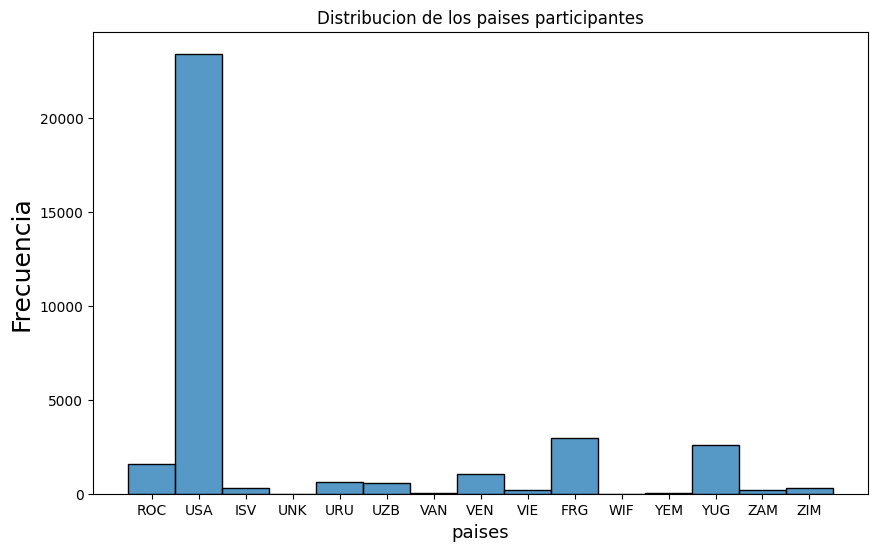

In [20]:
plt.figure(figsize=(10,6))
grafica = sns.histplot(data=Df, x='country_noc')
grafica.set_title('Distribucion de los paises participantes')
grafica.set_xlabel("paises", fontsize=13)
grafica.set_ylabel("Frecuencia", fontsize=18)

plt.show()

#### En el presente gráfico podemos visualizar la distribución de los paises que nos han tocado
#### en relación a la cantidad de participantes en todos los juegos.
#### Notoriamente podemos identificar a Estados Unidos como aquel país que tiene una mayor participación en toda su historia.


## Variable Sexo

#### En el siguiente grafico de tortas, podemos visualizar la cantidad de participantes de sexo masculino a comparación de femeninos.
#### Se identifica notoriamente que la cantidad de participantes masculinos es superior a los femeninos. Esto puede deberse a la poca participación femenina que existia en tiempos antiguos. 

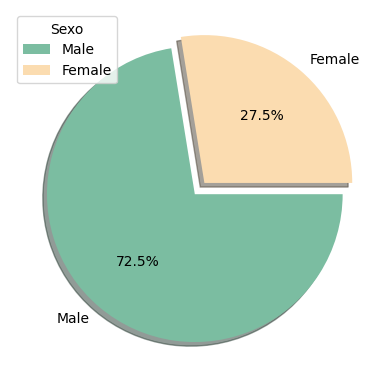

In [21]:
target = 'sex'
labels = ['F','M']
mycolors= ["#7bbda1", "#fbdcb0"]
features = [i for i in Df.columns.values if i not in [target]]
explode=np.zeros(len(labels))
explode[-1]=0.1
plt.pie(Df['sex'].value_counts(), labels=Df['sex'].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0,colors=mycolors)
plt.legend(title= "Sexo")
plt.show()

In [22]:
FiltGens = Df.filter(items=['year','country_noc','sex'])
GenspYear = FiltGens.groupby(['year','sex'])['year'].count().reset_index(name="Conteo")
GenspYear


,year,sex,Conteo
0,1896.0,Male,43
1,1900.0,Female,10
2,1900.0,Male,232
3,1904.0,Female,17
4,1904.0,Male,2814
...,...,...,...
66,2018.0,Male,359
67,2020.0,Female,827
68,2020.0,Male,755
69,2022.0,Female,372


#### En la tabla se puede apreciar la distribucion que tiene cada sexo a traves de cada edicion. A continuacion en el grafico de lineas se aprecia con mayor detalle 

<AxesSubplot:xlabel='year', ylabel='Conteo'>

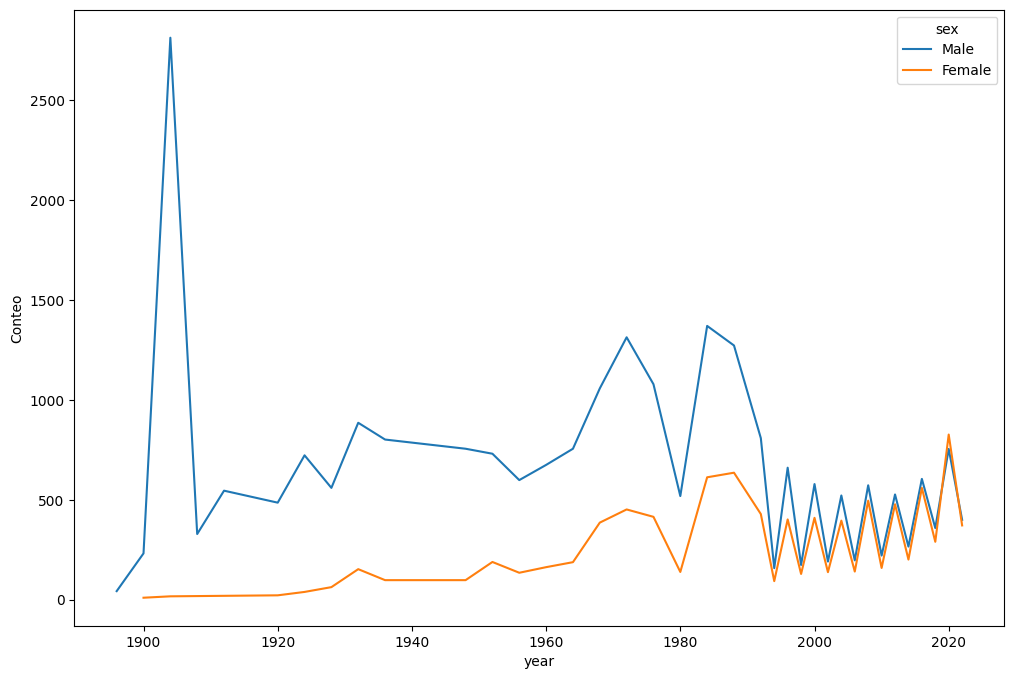

In [23]:
plt.figure(figsize=(12,8))
sns.lineplot(data = GenspYear, x='year', y='Conteo', hue='sex')

#### En la edicion de juegos de verano año 2020 Tokyo, fue por primera vez en la historia donde la brecha de genero alcanzo la equidad. Esto a causa del activismo y empoderamiento femenino que se ha visto marcado los ultimos años.

In [24]:
Df.filter(items=['year'])
AthTot = Df.filter(items=['year'])
AtletasTotales = AthTot.groupby(['year'])['year'].count().reset_index(name="Participantes")
AtletasTotales

,year,Participantes
0,1896.0,43
1,1900.0,242
2,1904.0,2831
3,1908.0,329
4,1912.0,546
5,1920.0,508
6,1924.0,762
7,1928.0,623
8,1932.0,1039
9,1936.0,900


#### Aqui se puede apreciar la participación que se tuvo por cada edicion

<AxesSubplot:xlabel='year', ylabel='Participantes'>

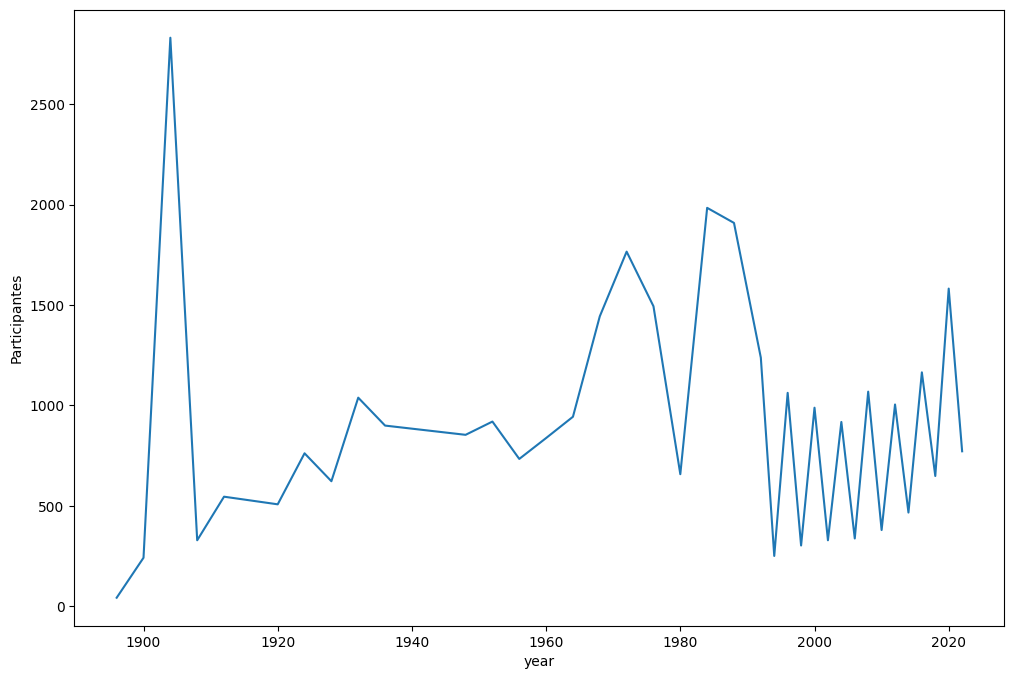

In [25]:
plt.figure(figsize=(12,8))
sns.lineplot(data = AtletasTotales, x='year', y='Participantes')

#### Sin tomar en cuenta las 2 primeras ediciones de los juegos olimpicos, se puede apreciar que la edicion del año 1994 fue la edición en la que se registraron menos participantes de los paises en estudio.

In [26]:
Oly1994 = Df.loc[Df['year']== 1994]
Oly1994

,athlete_id,pos,medal,isTeamSport,name,sex,born,height,weight,country,country_noc,event_title,edition,edition_id,sport,result_location,start_date,end_date,time,year
306828,97266,DNF,na,False,Erik Schlopy,Male,1972-08-21,178.0,86,United States,USA,"Slalom, Men",1994 Winter Olympics,45.0,Alpine Skiing,"Hafjell Alpinsenter, Øyer",1994-02-27,na,na,1994.0
306829,95516,5,na,False,Tommy Moe,Male,1970-02-17,178.0,89,United States,USA,"Combined, Men",1994 Winter Olympics,45.0,Alpine Skiing,"Hafjell Alpinsenter, Øyer",1994-02-14,1994-02-25,na,1994.0
306830,96724,31,na,False,Kyle Rasmussen,Male,1968-06-20,183.0,94,United States,USA,"Combined, Men",1994 Winter Olympics,45.0,Alpine Skiing,"Hafjell Alpinsenter, Øyer",1994-02-14,1994-02-25,na,1994.0
306831,85752,DNF,na,False,Chad Fleischer,Male,1972-01-04,188.0,102,United States,USA,"Combined, Men",1994 Winter Olympics,45.0,Alpine Skiing,"Hafjell Alpinsenter, Øyer",1994-02-14,1994-02-25,na,1994.0
306832,98258,DNF,na,False,Craig Thrasher,Male,1970-12-16,180.0,91,United States,USA,"Combined, Men",1994 Winter Olympics,45.0,Alpine Skiing,"Hafjell Alpinsenter, Øyer",1994-02-14,1994-02-25,na,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242327,82461,13,na,True,Aliki Sergaadu,Female,1972-10-05,167.0,52,Uzbekistan,UZB,"Ice Dancing, Mixed",1994 Winter Olympics,45.0,Figure Skating,"OL-Amfi, Hamar",1994-02-18,1994-02-21,na,1994.0
242328,96747,13,na,True,Yuris Razgulyayev,Male,1973-03-20,175.0,67,Uzbekistan,UZB,"Ice Dancing, Mixed",1994 Winter Olympics,45.0,Figure Skating,"OL-Amfi, Hamar",1994-02-18,1994-02-21,na,1994.0
242329,81959,21,na,True,Dinara Nurdbayeva,Female,1976-07-24,165.0,51,Uzbekistan,UZB,"Ice Dancing, Mixed",1994 Winter Olympics,45.0,Figure Skating,"OL-Amfi, Hamar",1994-02-18,1994-02-21,na,1994.0
242330,97450,21,na,True,Muslim Sattarov,Male,1965-11-12,171.0,68,Uzbekistan,UZB,"Ice Dancing, Mixed",1994 Winter Olympics,45.0,Figure Skating,"OL-Amfi, Hamar",1994-02-18,1994-02-21,na,1994.0


#### Para ver el nivel de participacion, filtramos al año de edicion, para ver que paises fueron los asistentes, donde la gran mayoría y casi los unicos fueron Estados Unidos

In [27]:
Oly1994['country'].value_counts()

 United States                   236
 United States Virgin Islands     10
 Uzbekistan                        5
Name: country, dtype: int64

#### Como grupo planteamos la hipostesis de que al ser unos "Juegos de Invierno" en un país donde las temperaturas son mas bajas de lo estandar(Noruega) esto provocó que gran parte de los paises no fueran a competir, el unico excento de esto es Estados Unidos, país el cual tiene un clima mas frio en algunas epocas del año.


#### Para reafirmar esto, investigamos y dimos con la informacion de que efectivamente, fue casi un record histórico hasta esa fecha el frio que se dio para esa edicion de los juegos olimpicos.

Fuente: https://www.bustle.com/p/the-coldest-winter-olympics-in-history-might-lose-its-spot-to-pyeongchang-8160114

In [28]:
df['height'] = pd.to_numeric(df['height'],downcast="float")
df['weight'] = df['weight'].str.slice(0,2)
df['weight'] = pd.to_numeric(df['weight'],downcast="float")

In [29]:
df['IMC'] = np.round(df['weight'] / ((df['height'] / 100) ** 2), 2)

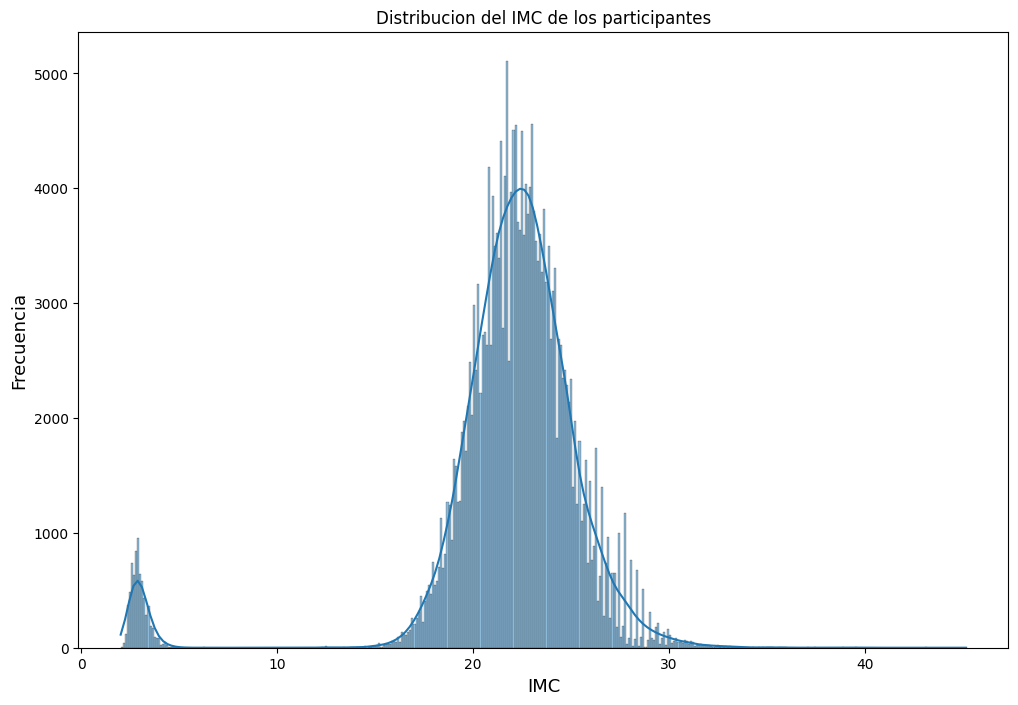

In [30]:
plt.figure(figsize=(12,8))
grafica = sns.histplot(data=df, x='IMC', kde=True,)
grafica.set_title('Distribucion del IMC de los participantes')
grafica.set_xlabel("IMC", fontsize=13)
grafica.set_ylabel("Frecuencia", fontsize=13)


#plt.xlim((60))
plt.show()

#### En el presente grafico de distribución podemos notar que la concentración va desde los 20 hasta los 25 de indice de massa corporal. 
#### De acuerdo a los rangos de indice de masa corporal, estar entre los 18.5 hasta los 24.9 de IMC, quiere decir que la mayoria de participantes tienen una clasificación normal, considerando que la mayoria de disciplinas son de tipo deportivas fisicos y la minoría actividades artisticas.

In [31]:
from scipy.stats import normaltest
_, pval = normaltest(df['IMC'])
if pval < 0.05:
    print('La columna no se ajusta a una distribución normal')
else:
    print('La columna se ajusta a una distribución normal')

La columna se ajusta a una distribución normal


## Conclusión

#### Tras el analisis y estudio de distintas variables y tendencias podemos confirmar que a partir de los datos y la información se pueden sacar grandes conclusiones, mediante las distintas librerias trabajadas se pudo graficar también esta informacion, una de ellas fue la participacion del sexo femenino, la cual en las primeras ediciones fue practicamente nula debido al machismo y desigualdad que existia, hoy en dia ya existe equidad en este ambito de los deportes.Gracias a toda esta información extraida a partir de los datos sumada a la informacion historica existente en internet, podemos confirmar las hipotesis planteadas durante el transcurso de este trabajo